In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

In [2]:
data = pl.read_csv('./dataset/6.Pricing_Test/test_results.csv')
user = pl.read_csv('./dataset/6.Pricing_Test/user_table.csv')

In [4]:
data = data.join(user, on='user_id', how='left')

In [10]:
data = data.with_columns(
    pl.col('timestamp').str.replace(':60:', ':59:').str.to_datetime()
)

In [11]:
data.describe()

statistic,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
str,f64,str,str,str,str,f64,f64,f64,str,str,f64,f64
"""count""",316800.0,"""316800""","""316800""","""316800""","""316800""",316800.0,316800.0,316800.0,"""275616""","""275616""",275616.0,275616.0
"""null_count""",0.0,"""0""","""0""","""0""","""0""",0.0,0.0,0.0,"""41184""","""41184""",41184.0,41184.0
"""mean""",499281.34184,"""2015-04-17 07:56:53.353163""",null,null,null,0.360079,46.205051,0.018333,null,null,37.11168,-93.981772
"""std""",288591.154044,null,null,null,null,0.480024,9.601487,0.134154,null,null,5.209627,18.086486
"""min""",3.0,"""2015-03-02 00:04:12""","""ads-bing""","""mobile""","""android""",0.0,39.0,0.0,"""Abilene""","""USA""",19.7,-157.8
"""25%""",249526.0,"""2015-03-26 11:26:04""",null,null,null,0.0,39.0,0.0,null,null,33.66,-112.2
"""50%""",499022.0,"""2015-04-17 13:12:45""",null,null,null,0.0,39.0,0.0,null,null,37.74,-88.93
"""75%""",749025.0,"""2015-05-09 12:52:33""",null,null,null,1.0,59.0,0.0,null,null,40.7,-78.91
"""max""",1e6,"""2015-05-31 23:59:45""","""seo_facebook""","""web""","""windows""",1.0,59.0,1.0,"""Yuma""","""USA""",61.18,30.31


In [12]:
data = data.drop_nulls(subset=['city', 'country', 'lat', 'long'])

In [14]:
data.head()

user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
i64,datetime[μs],str,str,str,i64,i64,i64,str,str,f64,f64
604839,2015-05-08 03:38:34,"""ads_facebook""","""mobile""","""iOS""",0,39,0,"""Buffalo""","""USA""",42.89,-78.86
624057,2015-05-10 21:08:46,"""seo-google""","""mobile""","""android""",0,39,0,"""Lakeville""","""USA""",44.68,-93.24
317970,2015-04-04 15:01:23,"""ads-bing""","""mobile""","""android""",0,39,0,"""Parma""","""USA""",41.38,-81.73
685636,2015-05-07 07:26:01,"""direct_traffic""","""mobile""","""iOS""",1,59,0,"""Fayetteville""","""USA""",35.07,-78.9
820854,2015-05-24 11:04:40,"""ads_facebook""","""web""","""mac""",0,39,0,"""Fishers""","""USA""",39.95,-86.02


In [24]:
data = data.with_columns(
  pl.when((pl.col('price') == 39) & (pl.col('test') == 0)).then(True)
    .when((pl.col('price') == 59) & (pl.col('test') == 1)).then(True)
    .otherwise(False)
    .alias('price_check')
)

In [25]:
data['price_check'].value_counts()

price_check,count
bool,u32
false,322
true,275294


In [26]:
data = data.filter(pl.col('price_check'))

In [28]:
data['price'].value_counts()

price,count
i64,u32
39,176241
59,99053


<Axes: >

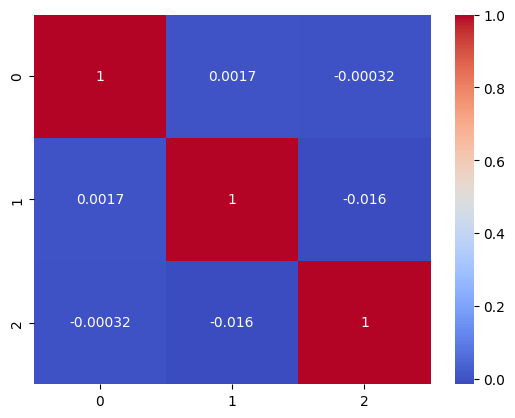

In [29]:
data_cor = data[['timestamp', 'price', 'converted']]
sns.heatmap(data_cor.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='operative_system', ylabel='count'>

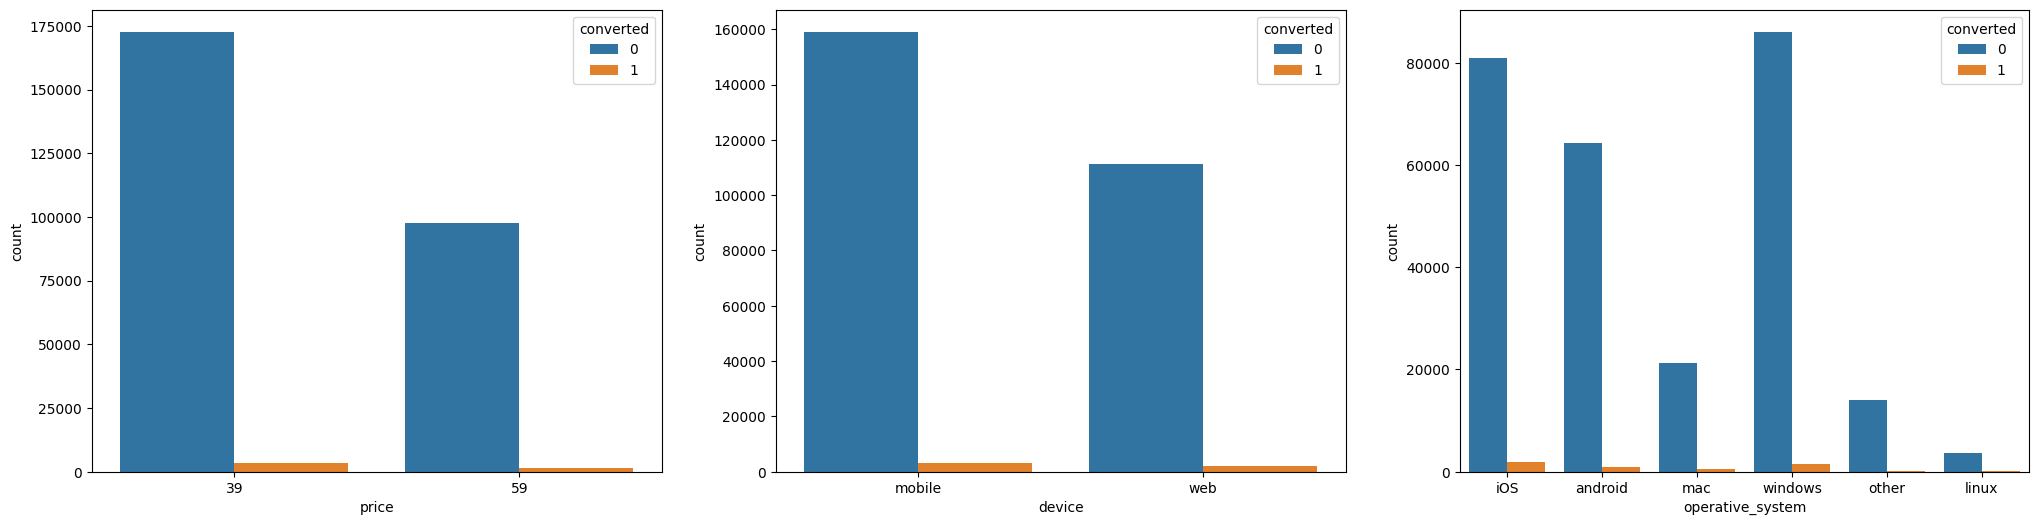

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(25, 6))
sns.countplot(x='price', hue='converted', data=data, ax=ax[0])
sns.countplot(x='device', hue='converted', data=data, ax=ax[1])
sns.countplot(x='operative_system', hue='converted', data=data, ax=ax[2])

<Axes: xlabel='device', ylabel='converted'>

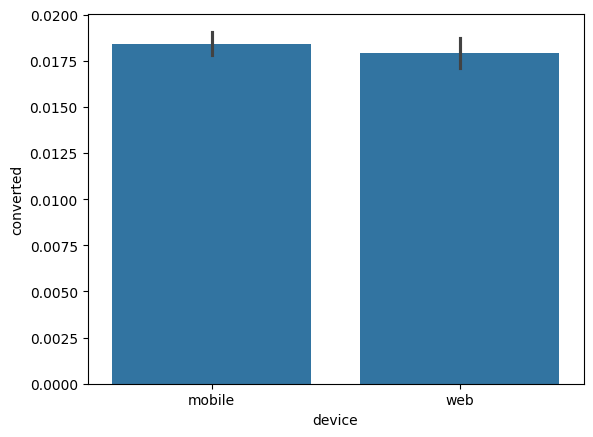

In [31]:
sns.barplot(x='device', y='converted', data=data)

<Axes: xlabel='operative_system', ylabel='converted'>

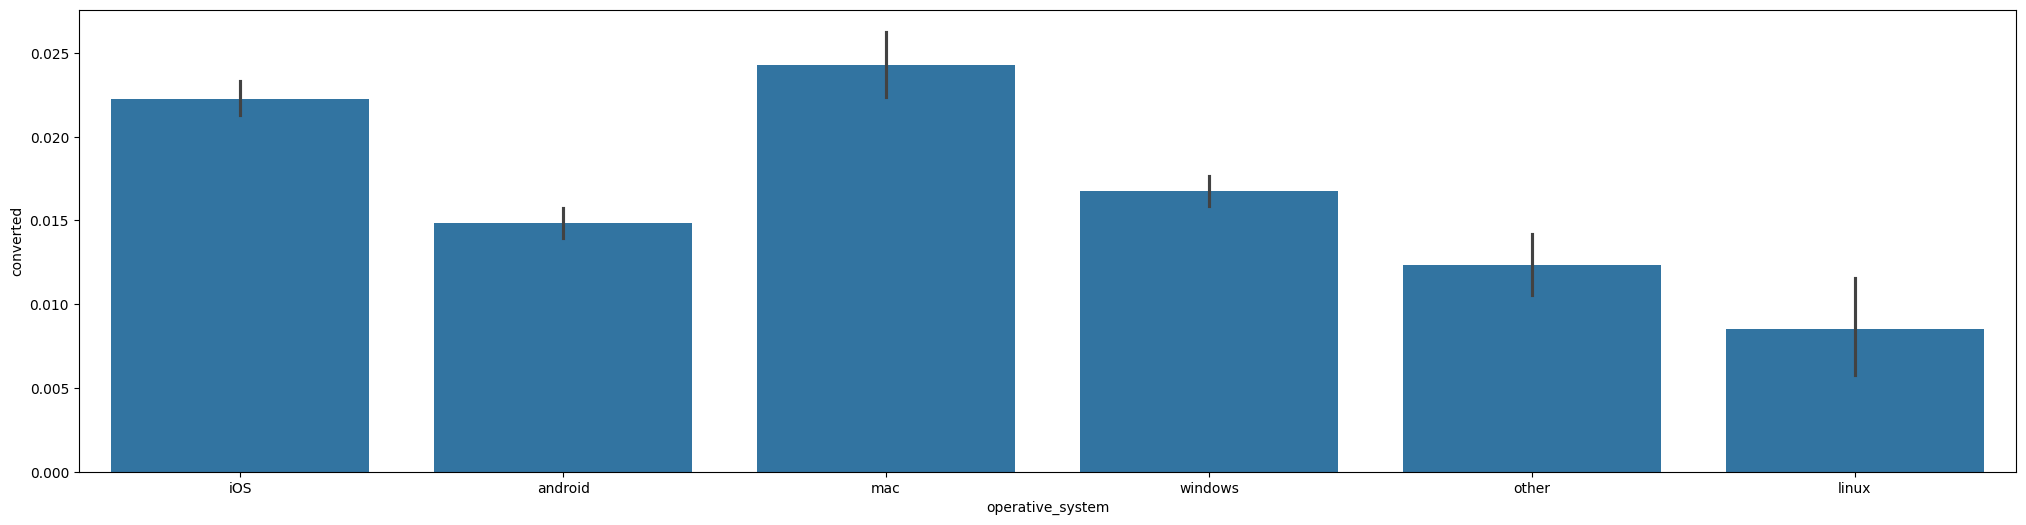

In [32]:
fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(x='operative_system', y='converted', data=data)

<Axes: xlabel='source', ylabel='count'>

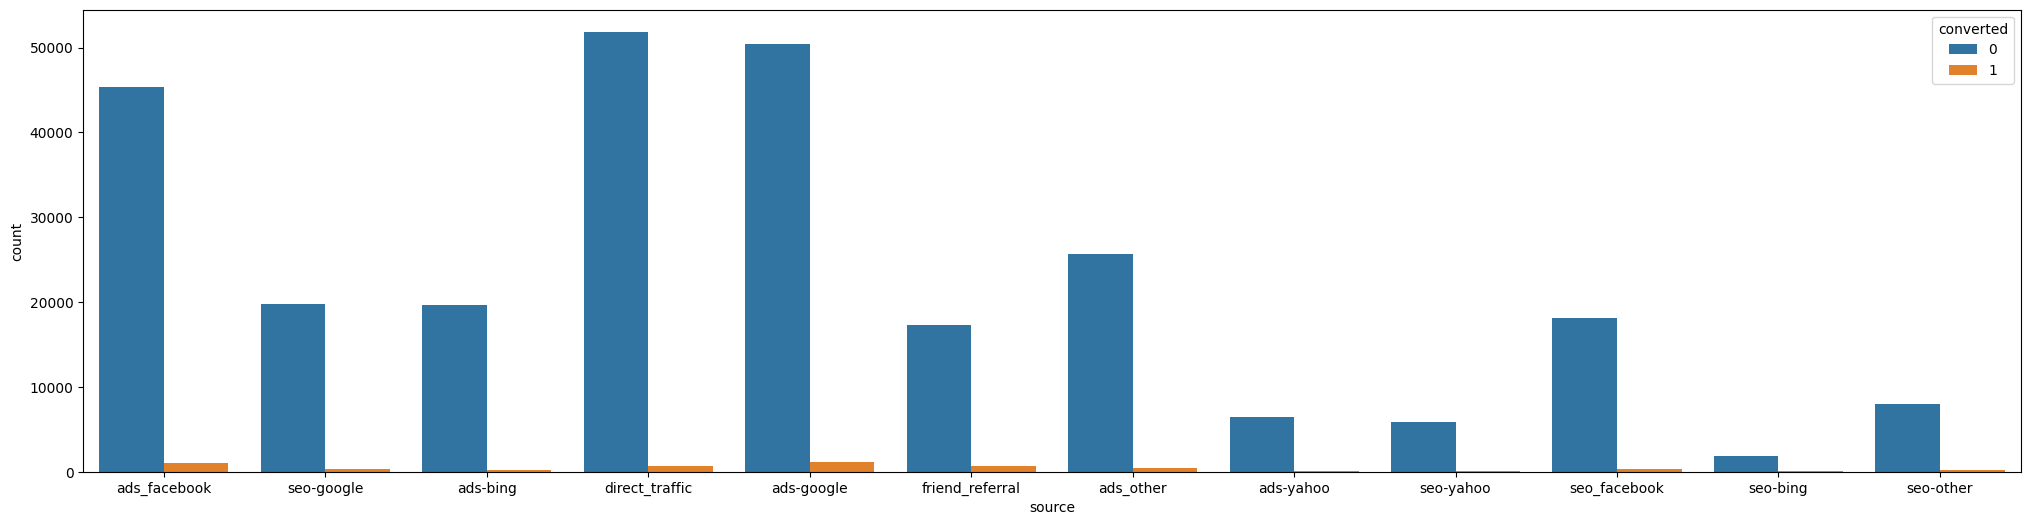

In [33]:
fig, ax = plt.subplots(figsize=(25, 6))
sns.countplot(x='source', hue='converted', data=data)

<Axes: xlabel='source', ylabel='converted'>

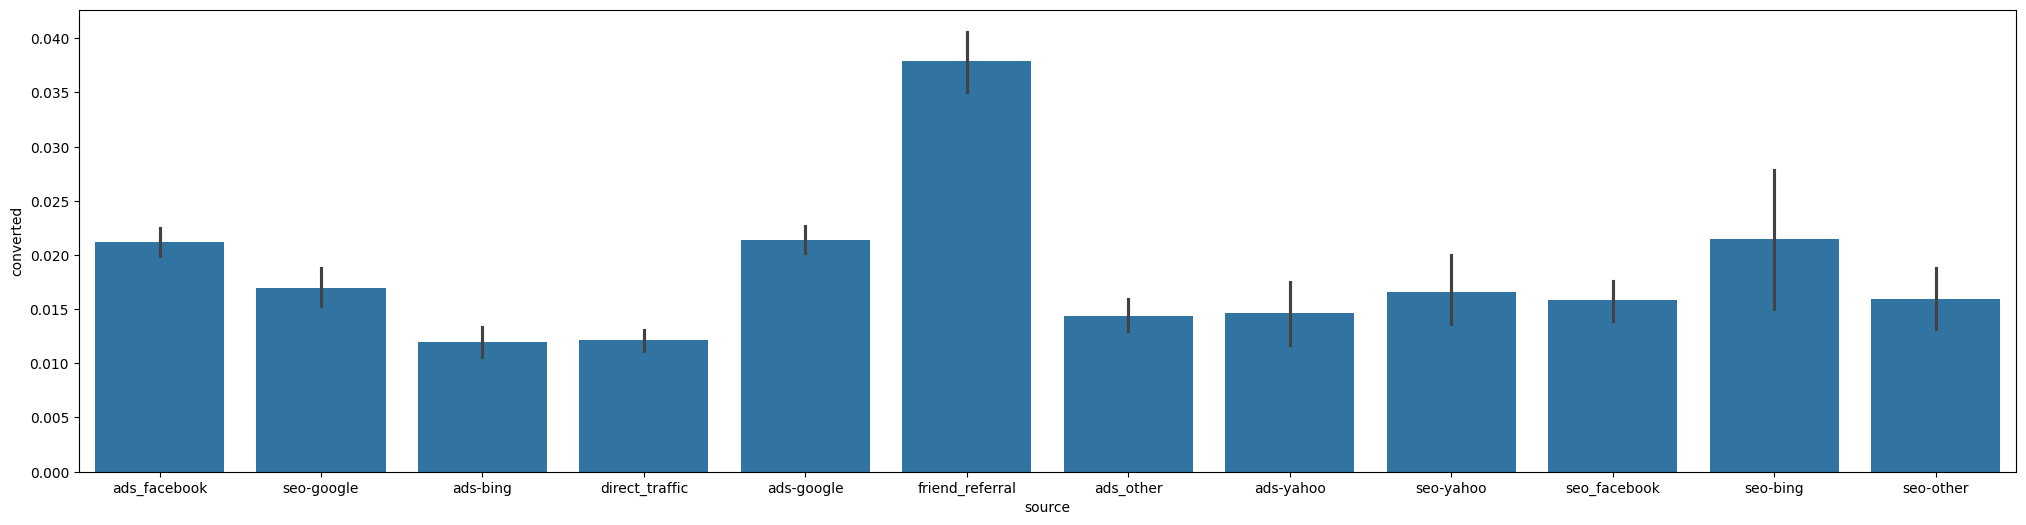

In [34]:
fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(x='source', y='converted', data=data)

<Axes: xlabel='long', ylabel='lat'>

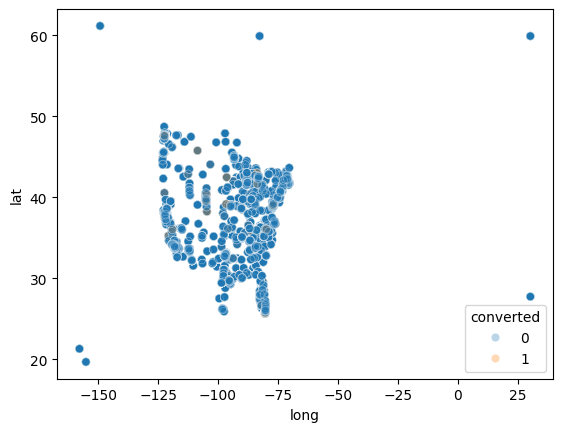

In [35]:
sns.scatterplot(x='long', y='lat', data=data, hue='converted', alpha=0.3)

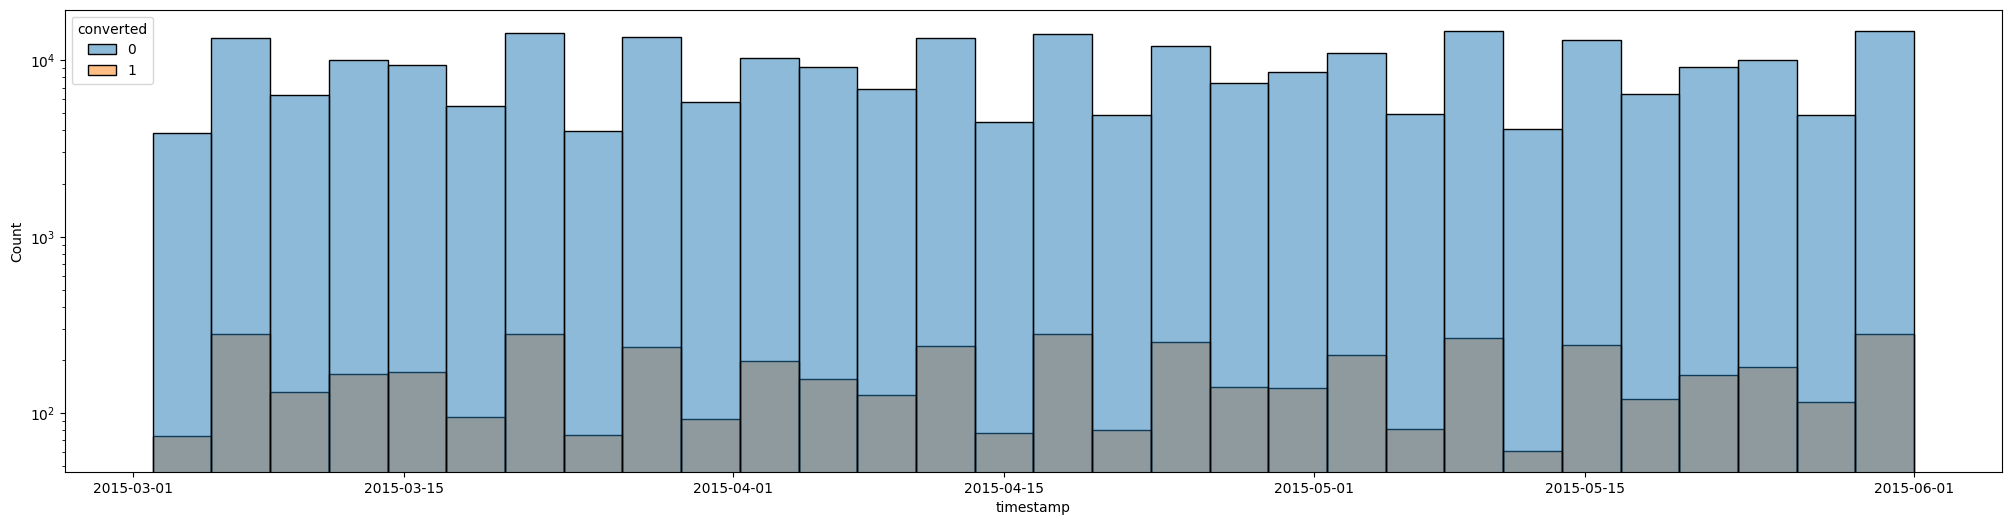

In [36]:
plt.figure(figsize=(25, 6))
sns.histplot(data=data, x='timestamp', hue='converted', bins=30);
plt.yscale('log')

In [40]:
data = data.with_columns(
    pl.col('timestamp').dt.weekday().alias('weekday')
)

In [43]:
data.group_by('weekday').agg(pl.mean('converted')).sort('weekday')

weekday,converted
i8,f64
1,0.017727
2,0.016141
3,0.017637
4,0.018347
5,0.018622
6,0.018093
7,0.018704
